In [124]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
zillow=pd.read_csv('Zillow_Austin_11-16-22.csv')
zillow

,price,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,latitude,longitude,isZillowOwned,variableData,badgeInfo,pgapt,sgapt,zestimate,info3String,brokerName
0,445000,445000,"8916 Mountain Shadows Cv APT B, Austin, TX 78735",8916 Mountain Shadows Cv APT B,Austin,TX,78735,3.0,3.0,1802.0,30.269207,-97.862060,False,"{'type': 'PRICE_REDUCTION', 'text': '$20,000 (...",NaN,ForSale,For Sale (Broker),1189900,https://photos.zillowstatic.com/fp/98ab7c7b289...,Realty Austin
1,1995000,1995000,"1701 Alguno Rd, Austin, TX 78757",1701 Alguno Rd,Austin,TX,78757,4.0,4.0,3443.0,30.333755,-97.734140,False,"{'type': 'DAYS_ON', 'text': '19 days on Zillow'}",NaN,ForSale,New Construction,2154600,https://photos.zillowstatic.com/fp/98ab7c7b289...,Jimmy Gilmore & Co
2,929900,929900,"1800 Kinney Ave, Austin, TX 78704",1800 Kinney Ave,Austin,TX,78704,2.0,2.0,1318.0,30.252070,-97.768600,False,"{'type': 'OPEN_HOUSE', 'text': 'Open: Sat. 2-4...",NaN,ForSale,For Sale (Broker),1048700,https://photos.zillowstatic.com/fp/98ab7c7b289...,Keller Williams Realty
3,6495000,6495000,"2407 Pemberton Pl, Austin, TX 78703",2407 Pemberton Pl,Austin,TX,78703,5.0,6.0,5000.0,30.290514,-97.753610,False,"{'type': 'PRICE_REDUCTION', 'text': '$500,000 ...",NaN,ForSale,For Sale (Broker),6553400,https://photos.zillowstatic.com/fp/98ab7c7b289...,Douglas Elliman Real Estate
4,365000,365000,"11701 Lansdowne Rd, Austin, TX 78754",11701 Lansdowne Rd,Austin,TX,78754,4.0,2.0,2127.0,30.355240,-97.612920,False,"{'type': '3D_HOME', 'text': '3D Tour'}",NaN,ForSale,For Sale (Broker),421000,https://photos.zillowstatic.com/fp/98ab7c7b289...,Orchard Brokerage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,9990000,9990000,"1209 N Weston Ln, Austin, TX 78733",1209 N Weston Ln,Austin,TX,78733,5.0,8.0,8357.0,30.326190,-97.844025,False,"{'type': 'DAYS_ON', 'text': '97 days on Zillow'}",NaN,ForSale,For Sale (Broker),0,https://photos.zillowstatic.com/fp/98ab7c7b289...,Moreland Properties
796,11250800,11250800,"3603 Stoneridge Rd, Austin, TX 78746",3603 Stoneridge Rd,Austin,TX,78746,5.0,8.0,7947.0,NaN,NaN,False,"{'type': 'DAYS_ON', 'text': '78 days on Zillow'}",NaN,ForSale,New Construction,0,https://photos.zillowstatic.com/fp/98ab7c7b289...,Moreland Properties
797,13000000,13000000,"1301 W 29th St, Austin, TX 78703",1301 W 29th St,Austin,TX,78703,5.0,7.0,6528.0,30.299100,-97.749725,False,"{'type': 'DAYS_ON', 'text': '39 days on Zillow'}",NaN,ForSale,For Sale (Broker),0,https://photos.zillowstatic.com/fp/98ab7c7b289...,"Compass RE Texas, LLC"
798,13500000,13500000,"7849 Escala Dr, Austin, TX 78735",7849 Escala Dr,Austin,TX,78735,5.0,7.0,8549.0,30.271202,-97.867645,False,"{'type': 'PRICE_REDUCTION', 'text': '$1,499,00...",NaN,ForSale,For Sale (Broker),0,https://photos.zillowstatic.com/fp/98ab7c7b289...,Moreland Properties


In [126]:
zillow.head()

,price,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,latitude,longitude,isZillowOwned,variableData,badgeInfo,pgapt,sgapt,zestimate,info3String,brokerName
0,445000,445000,"8916 Mountain Shadows Cv APT B, Austin, TX 78735",8916 Mountain Shadows Cv APT B,Austin,TX,78735,3.0,3.0,1802.0,30.269207,-97.86206,False,"{'type': 'PRICE_REDUCTION', 'text': '$20,000 (...",NaN,ForSale,For Sale (Broker),1189900,https://photos.zillowstatic.com/fp/98ab7c7b289...,Realty Austin
1,1995000,1995000,"1701 Alguno Rd, Austin, TX 78757",1701 Alguno Rd,Austin,TX,78757,4.0,4.0,3443.0,30.333755,-97.73414,False,"{'type': 'DAYS_ON', 'text': '19 days on Zillow'}",NaN,ForSale,New Construction,2154600,https://photos.zillowstatic.com/fp/98ab7c7b289...,Jimmy Gilmore & Co
2,929900,929900,"1800 Kinney Ave, Austin, TX 78704",1800 Kinney Ave,Austin,TX,78704,2.0,2.0,1318.0,30.252070,-97.76860,False,"{'type': 'OPEN_HOUSE', 'text': 'Open: Sat. 2-4...",NaN,ForSale,For Sale (Broker),1048700,https://photos.zillowstatic.com/fp/98ab7c7b289...,Keller Williams Realty
3,6495000,6495000,"2407 Pemberton Pl, Austin, TX 78703",2407 Pemberton Pl,Austin,TX,78703,5.0,6.0,5000.0,30.290514,-97.75361,False,"{'type': 'PRICE_REDUCTION', 'text': '$500,000 ...",NaN,ForSale,For Sale (Broker),6553400,https://photos.zillowstatic.com/fp/98ab7c7b289...,Douglas Elliman Real Estate
4,365000,365000,"11701 Lansdowne Rd, Austin, TX 78754",11701 Lansdowne Rd,Austin,TX,78754,4.0,2.0,2127.0,30.355240,-97.61292,False,"{'type': '3D_HOME', 'text': '3D Tour'}",NaN,ForSale,For Sale (Broker),421000,https://photos.zillowstatic.com/fp/98ab7c7b289...,Orchard Brokerage


In [127]:
zillow.tail()

,price,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,latitude,longitude,isZillowOwned,variableData,badgeInfo,pgapt,sgapt,zestimate,info3String,brokerName
795,9990000,9990000,"1209 N Weston Ln, Austin, TX 78733",1209 N Weston Ln,Austin,TX,78733,5.0,8.0,8357.0,30.326190,-97.844025,False,"{'type': 'DAYS_ON', 'text': '97 days on Zillow'}",NaN,ForSale,For Sale (Broker),0,https://photos.zillowstatic.com/fp/98ab7c7b289...,Moreland Properties
796,11250800,11250800,"3603 Stoneridge Rd, Austin, TX 78746",3603 Stoneridge Rd,Austin,TX,78746,5.0,8.0,7947.0,NaN,NaN,False,"{'type': 'DAYS_ON', 'text': '78 days on Zillow'}",NaN,ForSale,New Construction,0,https://photos.zillowstatic.com/fp/98ab7c7b289...,Moreland Properties
797,13000000,13000000,"1301 W 29th St, Austin, TX 78703",1301 W 29th St,Austin,TX,78703,5.0,7.0,6528.0,30.299100,-97.749725,False,"{'type': 'DAYS_ON', 'text': '39 days on Zillow'}",NaN,ForSale,For Sale (Broker),0,https://photos.zillowstatic.com/fp/98ab7c7b289...,"Compass RE Texas, LLC"
798,13500000,13500000,"7849 Escala Dr, Austin, TX 78735",7849 Escala Dr,Austin,TX,78735,5.0,7.0,8549.0,30.271202,-97.867645,False,"{'type': 'PRICE_REDUCTION', 'text': '$1,499,00...",NaN,ForSale,For Sale (Broker),0,https://photos.zillowstatic.com/fp/98ab7c7b289...,Moreland Properties
799,18000000,18000000,"805 Congress Ave, Austin, TX 78701",805 Congress Ave,Austin,TX,78701,3.0,8.0,14025.0,30.270054,-97.741615,False,"{'type': 'DAYS_ON', 'text': '107 days on Zillow'}",NaN,ForSale,For Sale (Broker),0,NaN,RE/MAX Posh Properties


In [128]:
zillow.shape

(800, 20)

In [129]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             800 non-null    int64  
 1   unformattedPrice  800 non-null    int64  
 2   address           800 non-null    object 
 3   addressStreet     800 non-null    object 
 4   addressCity       800 non-null    object 
 5   addressState      800 non-null    object 
 6   addressZipcode    800 non-null    int64  
 7   beds              785 non-null    float64
 8   baths             799 non-null    float64
 9   area              796 non-null    float64
 10  latitude          786 non-null    float64
 11  longitude         786 non-null    float64
 12  isZillowOwned     800 non-null    bool   
 13  variableData      800 non-null    object 
 14  badgeInfo         0 non-null      float64
 15  pgapt             800 non-null    object 
 16  sgapt             800 non-null    object 
 1

In [130]:
zillow.describe()

,price,unformattedPrice,addressZipcode,beds,baths,area,latitude,longitude,badgeInfo,zestimate
count,8.000000e+02,8.000000e+02,800.00000,785.000000,799.000000,796.000000,786.000000,786.000000,0.0,8.000000e+02
mean,9.696823e+05,9.696823e+05,78734.11500,3.331210,2.675845,2142.964824,30.293275,-97.764621,NaN,1.815941e+05
std,1.478447e+06,1.478447e+06,21.51576,0.976696,1.215524,1317.309700,0.092231,0.080536,NaN,5.112124e+05
min,9.990000e+04,9.990000e+04,78617.00000,0.000000,0.000000,391.000000,30.103233,-98.019940,NaN,0.000000e+00
25%,4.247500e+05,4.247500e+05,78724.00000,3.000000,2.000000,1386.000000,30.218251,-97.812345,NaN,0.000000e+00
50%,5.899500e+05,5.899500e+05,78739.00000,3.000000,2.000000,1840.500000,30.283288,-97.756465,NaN,0.000000e+00
75%,8.193750e+05,8.193750e+05,78748.00000,4.000000,3.000000,2493.000000,30.364248,-97.714425,NaN,2.931110e+05
max,1.800000e+07,1.800000e+07,78759.00000,7.000000,10.000000,14025.000000,30.516008,-97.570600,NaN,6.553400e+06


In [131]:
zillow.isnull().sum()

price                 0
unformattedPrice      0
address               0
addressStreet         0
addressCity           0
addressState          0
addressZipcode        0
beds                 15
baths                 1
area                  4
latitude             14
longitude            14
isZillowOwned         0
variableData          0
badgeInfo           800
pgapt                 0
sgapt                 0
zestimate             0
info3String          40
brokerName            8
dtype: int64

In [132]:
correlation=zillow.corr()

<AxesSubplot:>

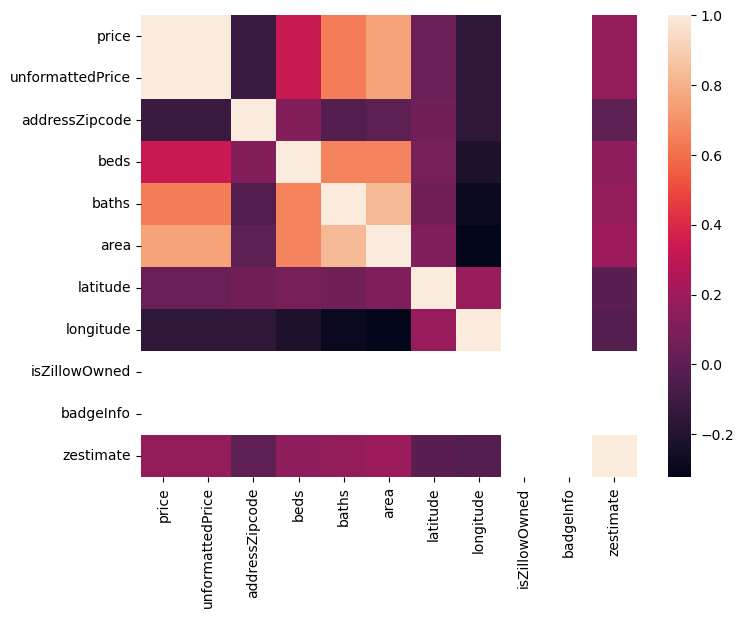

In [133]:
plt.figure(figsize=(8,6))
sns.heatmap(zillow.corr())

<AxesSubplot:xlabel='zestimate', ylabel='count'>

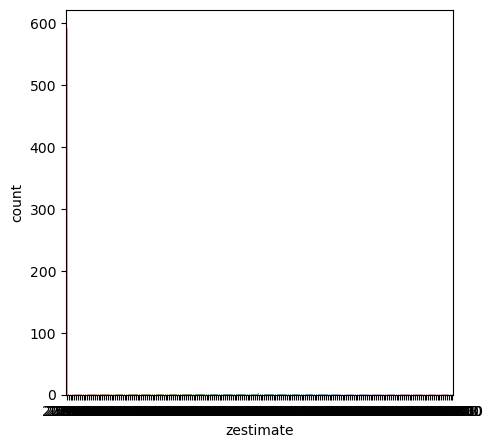

In [134]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x="zestimate",data=zillow)

<AxesSubplot:xlabel='price', ylabel='count'>

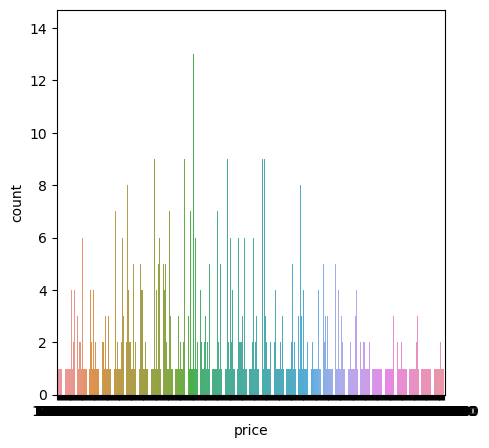

In [135]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x="price",data=zillow)

<AxesSubplot:xlabel='unformattedPrice', ylabel='count'>

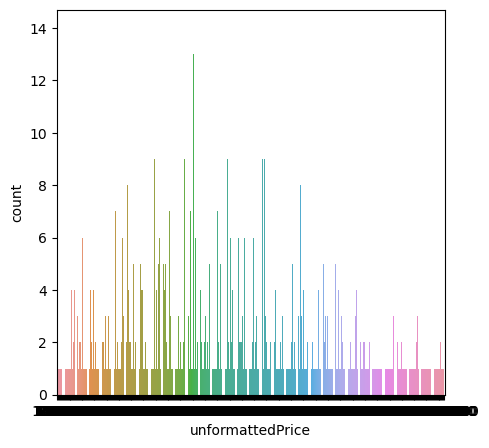

In [136]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x="unformattedPrice",data=zillow)

In [137]:
y=zillow['price']
y

0        445000
1       1995000
2        929900
3       6495000
4        365000
         ...   
795     9990000
796    11250800
797    13000000
798    13500000
799    18000000
Name: price, Length: 800, dtype: int64

In [138]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [179]:
x=zillow.drop(['price','info3String','badgeInfo','longitude','latitude','beds','zestimate','addressCity','addressState','isZillowOwned','pgapt'],axis=1)
x

,unformattedPrice,address,addressStreet,addressZipcode,baths,area,variableData,sgapt,brokerName
0,445000,"8916 Mountain Shadows Cv APT B, Austin, TX 78735",8916 Mountain Shadows Cv APT B,78735,3.0,1802.0,"{'type': 'PRICE_REDUCTION', 'text': '$20,000 (...",For Sale (Broker),Realty Austin
1,1995000,"1701 Alguno Rd, Austin, TX 78757",1701 Alguno Rd,78757,4.0,3443.0,"{'type': 'DAYS_ON', 'text': '19 days on Zillow'}",New Construction,Jimmy Gilmore & Co
2,929900,"1800 Kinney Ave, Austin, TX 78704",1800 Kinney Ave,78704,2.0,1318.0,"{'type': 'OPEN_HOUSE', 'text': 'Open: Sat. 2-4...",For Sale (Broker),Keller Williams Realty
3,6495000,"2407 Pemberton Pl, Austin, TX 78703",2407 Pemberton Pl,78703,6.0,5000.0,"{'type': 'PRICE_REDUCTION', 'text': '$500,000 ...",For Sale (Broker),Douglas Elliman Real Estate
4,365000,"11701 Lansdowne Rd, Austin, TX 78754",11701 Lansdowne Rd,78754,2.0,2127.0,"{'type': '3D_HOME', 'text': '3D Tour'}",For Sale (Broker),Orchard Brokerage
...,...,...,...,...,...,...,...,...,...
795,9990000,"1209 N Weston Ln, Austin, TX 78733",1209 N Weston Ln,78733,8.0,8357.0,"{'type': 'DAYS_ON', 'text': '97 days on Zillow'}",For Sale (Broker),Moreland Properties
796,11250800,"3603 Stoneridge Rd, Austin, TX 78746",3603 Stoneridge Rd,78746,8.0,7947.0,"{'type': 'DAYS_ON', 'text': '78 days on Zillow'}",New Construction,Moreland Properties
797,13000000,"1301 W 29th St, Austin, TX 78703",1301 W 29th St,78703,7.0,6528.0,"{'type': 'DAYS_ON', 'text': '39 days on Zillow'}",For Sale (Broker),"Compass RE Texas, LLC"
798,13500000,"7849 Escala Dr, Austin, TX 78735",7849 Escala Dr,78735,7.0,8549.0,"{'type': 'PRICE_REDUCTION', 'text': '$1,499,00...",For Sale (Broker),Moreland Properties


In [180]:
x['address']=le.fit_transform(x['address'])
x

,unformattedPrice,address,addressStreet,addressZipcode,baths,area,variableData,sgapt,brokerName
0,445000,746,8916 Mountain Shadows Cv APT B,78735,3.0,1802.0,"{'type': 'PRICE_REDUCTION', 'text': '$20,000 (...",For Sale (Broker),Realty Austin
1,1995000,242,1701 Alguno Rd,78757,4.0,3443.0,"{'type': 'DAYS_ON', 'text': '19 days on Zillow'}",New Construction,Jimmy Gilmore & Co
2,929900,257,1800 Kinney Ave,78704,2.0,1318.0,"{'type': 'OPEN_HOUSE', 'text': 'Open: Sat. 2-4...",For Sale (Broker),Keller Williams Realty
3,6495000,331,2407 Pemberton Pl,78703,6.0,5000.0,"{'type': 'PRICE_REDUCTION', 'text': '$500,000 ...",For Sale (Broker),Douglas Elliman Real Estate
4,365000,98,11701 Lansdowne Rd,78754,2.0,2127.0,"{'type': '3D_HOME', 'text': '3D Tour'}",For Sale (Broker),Orchard Brokerage
...,...,...,...,...,...,...,...,...,...
795,9990000,118,1209 N Weston Ln,78733,8.0,8357.0,"{'type': 'DAYS_ON', 'text': '97 days on Zillow'}",For Sale (Broker),Moreland Properties
796,11250800,415,3603 Stoneridge Rd,78746,8.0,7947.0,"{'type': 'DAYS_ON', 'text': '78 days on Zillow'}",New Construction,Moreland Properties
797,13000000,155,1301 W 29th St,78703,7.0,6528.0,"{'type': 'DAYS_ON', 'text': '39 days on Zillow'}",For Sale (Broker),"Compass RE Texas, LLC"
798,13500000,693,7849 Escala Dr,78735,7.0,8549.0,"{'type': 'PRICE_REDUCTION', 'text': '$1,499,00...",For Sale (Broker),Moreland Properties


In [181]:
x['addressStreet']=le.fit_transform(x['addressStreet'])
x

,unformattedPrice,address,addressStreet,addressZipcode,baths,area,variableData,sgapt,brokerName
0,445000,746,746,78735,3.0,1802.0,"{'type': 'PRICE_REDUCTION', 'text': '$20,000 (...",For Sale (Broker),Realty Austin
1,1995000,242,242,78757,4.0,3443.0,"{'type': 'DAYS_ON', 'text': '19 days on Zillow'}",New Construction,Jimmy Gilmore & Co
2,929900,257,257,78704,2.0,1318.0,"{'type': 'OPEN_HOUSE', 'text': 'Open: Sat. 2-4...",For Sale (Broker),Keller Williams Realty
3,6495000,331,331,78703,6.0,5000.0,"{'type': 'PRICE_REDUCTION', 'text': '$500,000 ...",For Sale (Broker),Douglas Elliman Real Estate
4,365000,98,98,78754,2.0,2127.0,"{'type': '3D_HOME', 'text': '3D Tour'}",For Sale (Broker),Orchard Brokerage
...,...,...,...,...,...,...,...,...,...
795,9990000,118,118,78733,8.0,8357.0,"{'type': 'DAYS_ON', 'text': '97 days on Zillow'}",For Sale (Broker),Moreland Properties
796,11250800,415,415,78746,8.0,7947.0,"{'type': 'DAYS_ON', 'text': '78 days on Zillow'}",New Construction,Moreland Properties
797,13000000,155,155,78703,7.0,6528.0,"{'type': 'DAYS_ON', 'text': '39 days on Zillow'}",For Sale (Broker),"Compass RE Texas, LLC"
798,13500000,693,693,78735,7.0,8549.0,"{'type': 'PRICE_REDUCTION', 'text': '$1,499,00...",For Sale (Broker),Moreland Properties


In [182]:
x['variableData']=le.fit_transform(x['variableData'])
x

,unformattedPrice,address,addressStreet,addressZipcode,baths,area,variableData,sgapt,brokerName
0,445000,746,746,78735,3.0,1802.0,183,For Sale (Broker),Realty Austin
1,1995000,242,242,78757,4.0,3443.0,18,New Construction,Jimmy Gilmore & Co
2,929900,257,257,78704,2.0,1318.0,78,For Sale (Broker),Keller Williams Realty
3,6495000,331,331,78703,6.0,5000.0,325,For Sale (Broker),Douglas Elliman Real Estate
4,365000,98,98,78754,2.0,2127.0,0,For Sale (Broker),Orchard Brokerage
...,...,...,...,...,...,...,...,...,...
795,9990000,118,118,78733,8.0,8357.0,58,For Sale (Broker),Moreland Properties
796,11250800,415,415,78746,8.0,7947.0,55,New Construction,Moreland Properties
797,13000000,155,155,78703,7.0,6528.0,37,For Sale (Broker),"Compass RE Texas, LLC"
798,13500000,693,693,78735,7.0,8549.0,95,For Sale (Broker),Moreland Properties


In [183]:
x.value_counts(['sgapt'])

sgapt            
For Sale (Broker)    755
New Construction      45
dtype: int64

In [184]:
x.replace({'sgapt':{'For Sale (Broker)':0,'New Construction':1}},inplace=True)
x

,unformattedPrice,address,addressStreet,addressZipcode,baths,area,variableData,sgapt,brokerName
0,445000,746,746,78735,3.0,1802.0,183,0,Realty Austin
1,1995000,242,242,78757,4.0,3443.0,18,1,Jimmy Gilmore & Co
2,929900,257,257,78704,2.0,1318.0,78,0,Keller Williams Realty
3,6495000,331,331,78703,6.0,5000.0,325,0,Douglas Elliman Real Estate
4,365000,98,98,78754,2.0,2127.0,0,0,Orchard Brokerage
...,...,...,...,...,...,...,...,...,...
795,9990000,118,118,78733,8.0,8357.0,58,0,Moreland Properties
796,11250800,415,415,78746,8.0,7947.0,55,1,Moreland Properties
797,13000000,155,155,78703,7.0,6528.0,37,0,"Compass RE Texas, LLC"
798,13500000,693,693,78735,7.0,8549.0,95,0,Moreland Properties


In [185]:
x['brokerName']=le.fit_transform(x['brokerName'])
x

,unformattedPrice,address,addressStreet,addressZipcode,baths,area,variableData,sgapt,brokerName
0,445000,746,746,78735,3.0,1802.0,183,0,172
1,1995000,242,242,78757,4.0,3443.0,18,1,97
2,929900,257,257,78704,2.0,1318.0,78,0,103
3,6495000,331,331,78703,6.0,5000.0,325,0,60
4,365000,98,98,78754,2.0,2127.0,0,0,149
...,...,...,...,...,...,...,...,...,...
795,9990000,118,118,78733,8.0,8357.0,58,0,136
796,11250800,415,415,78746,8.0,7947.0,55,1,136
797,13000000,155,155,78703,7.0,6528.0,37,0,46
798,13500000,693,693,78735,7.0,8549.0,95,0,136


In [186]:
x.isnull().sum()

unformattedPrice    0
address             0
addressStreet       0
addressZipcode      0
baths               1
area                4
variableData        0
sgapt               0
brokerName          0
dtype: int64

In [187]:
x=x.fillna(0)

In [188]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [189]:
x.shape,X_train.shape,X_test.shape

((800, 9), (720, 9), (80, 9))

In [192]:
X_train

,unformattedPrice,address,addressStreet,addressZipcode,baths,area,variableData,sgapt,brokerName
528,649999,552,552,78749,2.0,1635.0,221,0,45
16,525000,715,715,78748,2.0,1340.0,38,0,8
248,319900,385,385,78725,2.0,1522.0,337,0,174
408,495000,750,750,78758,3.0,1990.0,248,0,46
355,435000,46,46,78660,2.0,1535.0,45,0,94
...,...,...,...,...,...,...,...,...,...
715,1450000,759,759,78704,2.0,1575.0,26,0,56
767,3495000,354,354,78746,5.0,4320.0,11,0,114
72,246777,310,310,78741,2.0,850.0,45,0,252
235,295000,752,752,78758,2.0,1136.0,135,0,152


In [193]:
X_test

,unformattedPrice,address,addressStreet,addressZipcode,baths,area,variableData,sgapt,brokerName
8,449500,272,272,78741,3.0,1451.0,45,0,103
510,625000,602,602,78750,2.0,1913.0,202,0,172
175,998000,210,210,78704,2.0,1756.0,139,0,46
735,1750000,359,359,78734,3.0,3251.0,163,0,101
242,300000,132,132,78753,2.0,1115.0,10,0,172
...,...,...,...,...,...,...,...,...,...
120,495000,573,573,78745,2.0,1285.0,103,0,148
667,939000,364,364,78702,3.0,1881.0,91,1,252
59,399999,3,3,78753,2.0,1479.0,14,0,103
370,450000,682,682,78736,2.0,1640.0,0,0,46


In [194]:
tree=DecisionTreeRegressor()

In [195]:
tree.fit(X_train,y_train)
X_train_pred=tree.predict(X_train)
score=metrics.r2_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

tree.fit(X_test,y_test)
X_test_pred=tree.predict(X_test)
score=metrics.r2_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 1.0
accuracy score of test data: 1.0


In [196]:
fore=RandomForestRegressor()

In [197]:
fore.fit(X_train,y_train)
X_train_pred=fore.predict(X_train)
score=metrics.r2_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

fore.fit(X_test,y_test)
X_test_pred=fore.predict(X_test)
score=metrics.r2_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.9963025837297126
accuracy score of test data: 0.9892570602821512


In [198]:
li=LinearRegression()

In [199]:
li.fit(X_train,y_train)
X_train_pred=li.predict(X_train)
score=metrics.r2_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

li.fit(X_test,y_test)
X_test_pred=li.predict(X_test)
score=metrics.r2_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 1.0
accuracy score of test data: 1.0


In [203]:
input_data=(525000,715,715,78748,2.0,1340.0,38,0,8)
input_data_as_np=np.asarray(input_data)
reshaped=input_data_as_np.reshape(1,-1)
prediction=li.predict(reshaped)
prediction

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([525000.])

In [204]:
print('The price is ',prediction[0])

The price is  525000.0000000002
